<a href="https://colab.research.google.com/github/Sharad-t/Seoul_Bike_Sharing_Demand_Predction/blob/main/NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name- Seoul Bike Sharing Demand Prediction**    #  



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **NAME -Sharad Tiwari**
##### **Data Science Trainee**
##### **AlmaBetter**

# **Project Summary -**

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.**

**It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.**
 
**Eventually, providing the city with a stable** **supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes**

# **GitHub Link -**

**https://github.com/Sharad-t/Seoul_Bike_Sharing_Demand_Predction**

# **Problem Statement**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [133]:
# Importing Required Libraries

import pandas as pd                                                                            # pandas for data manipulation
import numpy as np                                                                             # Numerical python for dealing with maths or arrays
import seaborn as sb                                                                           # Seaborn  for data visualization
import matplotlib.pyplot as plt                                                                # matplotlib for data visualization
import sklearn as sk                                                                           # Scikit-learn for the  ML models


from sklearn.preprocessing import MinMaxScaler                                                 # Min-Max Scaler 
from sklearn.preprocessing import OneHotEncoder                                                # Encode categorical features as a one-hot numeric array.
from sklearn.preprocessing import MultiLabelBinarizer                                          # Transform between iterable of iterables and a multilabel format.

from sklearn.linear_model import LinearRegression                                              # Linear Regression Model 
from sklearn.linear_model import Lasso                                                         # Lasso Regression Model
from sklearn.linear_model import Ridge                                                         # Ridge Regression Model
from sklearn.linear_model import ElasticNet                                                    #  ElasticNet Regression Model
from sklearn.tree import DecisionTreeRegressor                                                 # Decsion Tree Regressor Model
from sklearn.ensemble import RandomForestRegressor                                             # Random Forest Regressor Model
from sklearn.ensemble import GradientBoostingRegressor                                         # Gradient Booster Regressor Model

from sklearn.model_selection import cross_validate                                             # Cross Validation
from sklearn.model_selection import train_test_split                                           # Train-Test Split for Spliting the Dataset
from sklearn.model_selection import GridSearchCV                                               # Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import cross_val_score                                            # Evaluate a score by cross-validation.
from sklearn.model_selection import RepeatedStratifiedKFold                                    # Repeats Stratified K-Fold n times with different randomization in each repetition.
from sklearn.model_selection import RandomizedSearchCV                                         # Randomized search on hyper parameters.

from sklearn import metrics                                                                    # includes score functions, performance metrics and pairwise metrics and distance computations.
from sklearn.metrics import r2_score                                                           # coefficient of determination regression score function.
from sklearn.metrics import mean_squared_error                                                 # Mean squared error regression loss
from sklearn.metrics import accuracy_score                                                     # Accuracy classification score.
from sklearn.metrics import mean_absolute_error                                                # Mean absolute error regression loss.
from sklearn.metrics import log_loss                                                           # logistic loss or cross-entropy loss.

from datetime import datetime                                                                  # for Converting date
import datetime as dt

import warnings                                                                                # Warnings for Ignoring Waring Messages
warnings.filterwarnings('ignore')

### Dataset Loading

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# Load Dataset
# df = pd.read_csv("SeoulBikeData.csv", encoding='latin')
df = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding= 'latin')

### Dataset First View

In [136]:
# Dataset First Look

# First Five Rows
df.head()       

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [137]:
# Last Five Rows
df.tail()      


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [138]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [139]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [140]:
# Dataset Duplicate Value Count
print('The duplicated values of the dataset is :-', df.duplicated().sum())

The duplicated values of the dataset is :- 0


#### Missing Values/Null Values

In [141]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

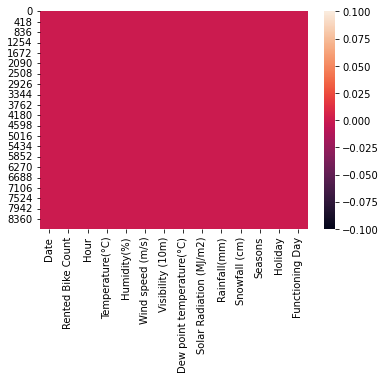

In [142]:
# Visualizing the missing values
sb.heatmap(df.isnull())

### What did you know about your dataset?

***This Dataset contains 8760 Rows and 14 columns.*** 

***In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.*** 

***There are no missing or NaN Values in the Dataset***

## ***2. Understanding Your Variables***

In [143]:
# Dataset Columns

print('The Features of the Data set are:- ')
df.columns


The Features of the Data set are:- 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [144]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description 



**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






### Check Unique Values for each variable.

In [145]:
# Checking Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [146]:
# Write your code to make your dataset analysis ready.

# Some of  the columns name in the dataset are too large and clumsy so we change the the into some simple name, and it don't affect our end results.

# Renaming the complex columns name
df=df.rename(columns={'Rented Bike Count':'Rented Bike Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew point temperature',
                                'Solar Radiation (MJ/m2)':'Solar Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})


In [147]:
# Breaking Down the Columns
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [148]:
# Seperating Date and into three columns Year,Day,Month
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [149]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"

df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day','year'],axis=1)

In [150]:
# A little Peek 
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [151]:
#Change the int64 column into category column

cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [152]:
# Checking the Data types in Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented Bike Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew point temperature  8760 non-null   float64 
 7   Solar Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

### What all manipulations have you done and insights you found?

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***

* So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider 

* this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need * the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

* Converted Int64 column to Categorcal Column

* Renamed the columns for better clarity






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

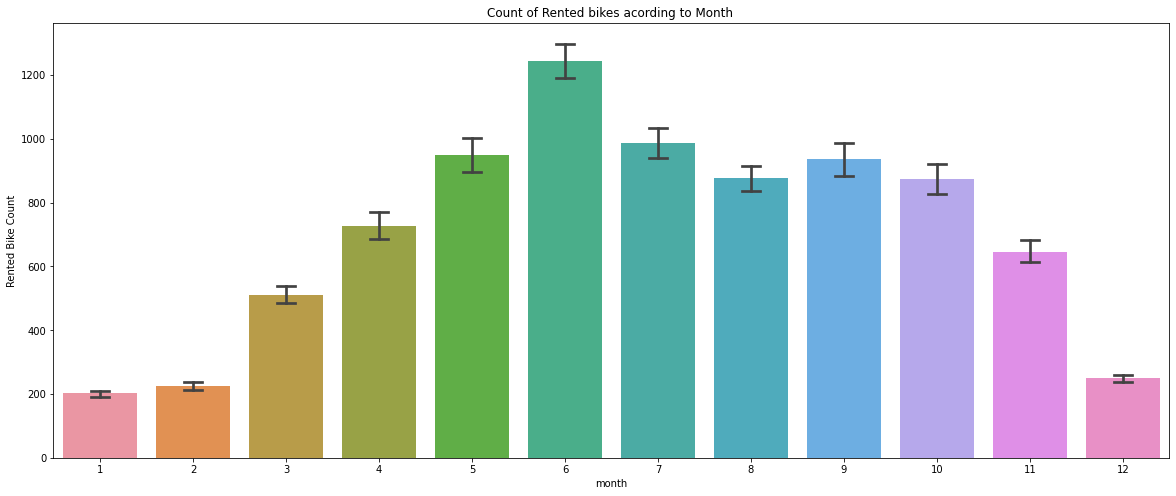

In [153]:
# Chart - 1 visualization code

#Count of Rented Bikes per month
fig,ax=plt.subplots(figsize=(20,8))
sb.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

**The bar Graph is one of the best Plot that can be used for the Comparision**

##### 2. What is/are the insight(s) found from the chart?

**From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.** 

##### 3. Will the gained insights help creating a positive business impact? 

**Yes , for sure this insight will help us to be prepared for the 6 month of every year as per the analysis we have understood that there are high requirement of bikes for rent.**

#### Chart - 2

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

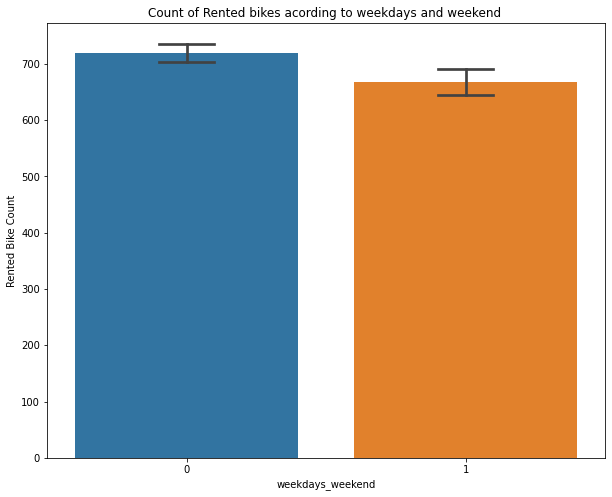

In [154]:
# Chart - 2 visualization code

# Count of Rented bikes acording to weekdays and weekend
fig,ax=plt.subplots(figsize=(10,8))
sb.barplot(data=df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

##### 1. Why did you pick the specific chart?

**As I have to find out when the bike gets rented Either weekdays or weekends so the Bar Graph is the Best suitable Plot that can be used as per my Requirement**

##### 2. What is/are the insight(s) found from the chart?

**I have got to know that more number of bikes get rented on Weekdays**

##### 3. Will the gained insights help creating a positive business impact? 

**Yes if I found out that more number of bike gets rented on weekdays it can be helped as a positive imapact on business.**

#### Chart - 3

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

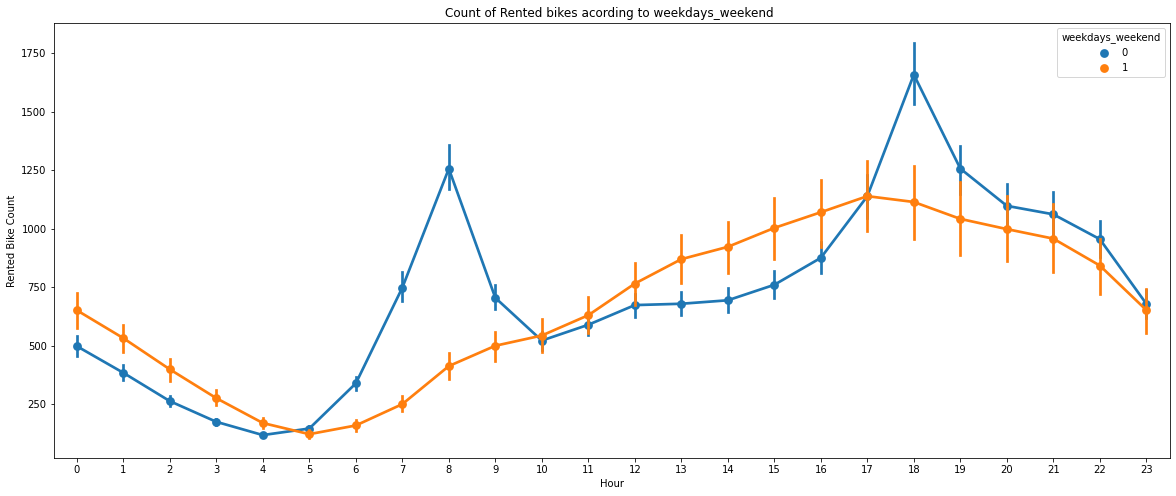

In [155]:
# Chart - 3 visualization code
# Count of Rented bikes acording to weekdays_weekend with respect to hours
fig,ax=plt.subplots(figsize=(20,8))
sb.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

##### 1. Why did you pick the specific chart?

**Point plots are the best when we need to compare various values**

##### 2. What is/are the insight(s) found from the chart?

* **From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.**

* **Peak Time are 7 am to 9 am and 5 pm to 7 pm***

* **The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***   

##### 3. Will the gained insights help creating a positive business impact? 

**Yes it can be a positive impact because of the knowledge of hours in which the more number of bike got rented out.**

#### Chart - 4

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

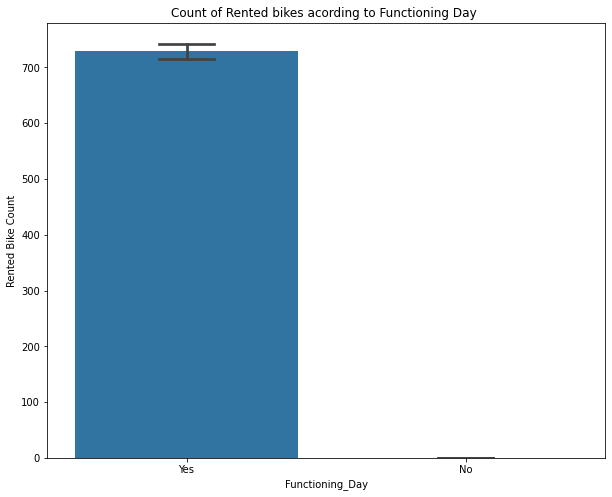

In [156]:
# Chart - 4 visualization code
# Count of Rented bikes acording to Functioning Day
fig,ax=plt.subplots(figsize=(10,8))
sb.barplot(data=df,x='Functioning_Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

**Here we have to comapare only two variable so the barplot is the best suitable option**

##### 2. What is/are the insight(s) found from the chart?

**I have found out that there are approx no bikes got rented on non functional day**

##### 3. Will the gained insights help creating a positive business impact? 

**Yes, as we can be prepared for the functional day and on the non functional day it can be acceptable but it can be a negetive imapact also if because as of the functional day or non functional day the bike are available for rent means there cannot be a less inventory on non functional day its not possible**

#### Chart - 5

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

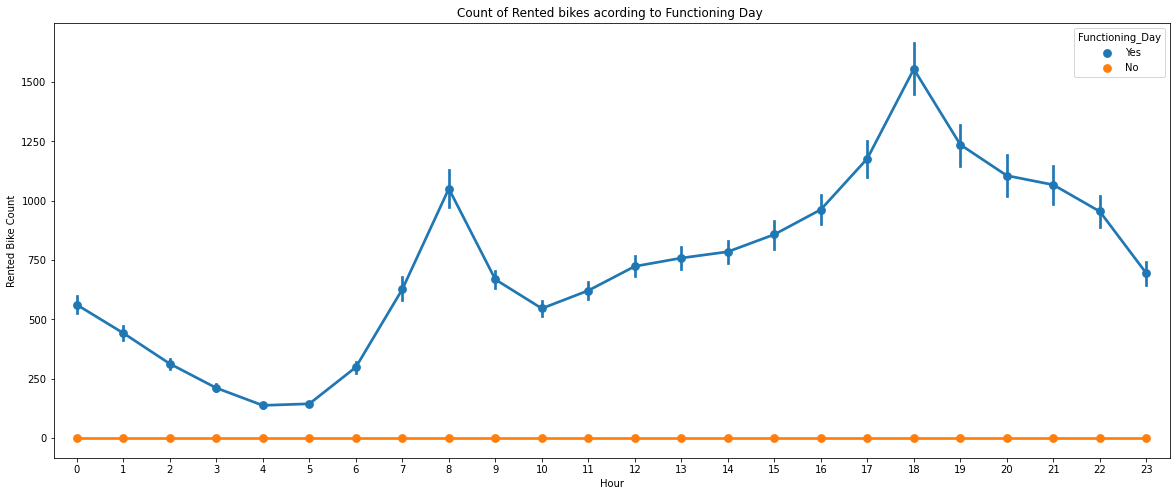

In [157]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sb.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

**I have to analyse whether bikes got rented on non functional Day or not. and line point chart is suitable for doing the task.**

##### 2. What is/are the insight(s) found from the chart?

**Peoples dont use reneted bikes in no functioning day.** 


##### 3. Will the gained insights help creating a positive business impact? 

**Yes we can lower our workforce on non functional day it can improve Productivity**

#### Chart - 6

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

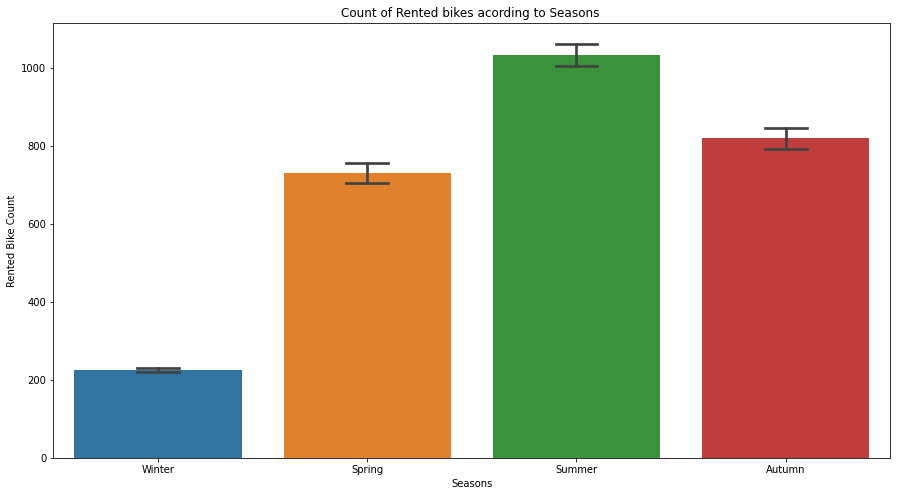

In [158]:
# Chart - 6 visualization code
# Count of Rented bikes acording to Seasons
fig,ax=plt.subplots(figsize=(15,8))
sb.barplot(data=df,x="Seasons",y="Rented Bike Count",ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

##### 1. Why did you pick the specific chart?

**The bar Graph helps to find the comparision and I have to find in which season more bike got rented**

##### 2. What is/are the insight(s) found from the chart?

**The above Bar Chart clearly shows us that in summer season the use of rented bike is high.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

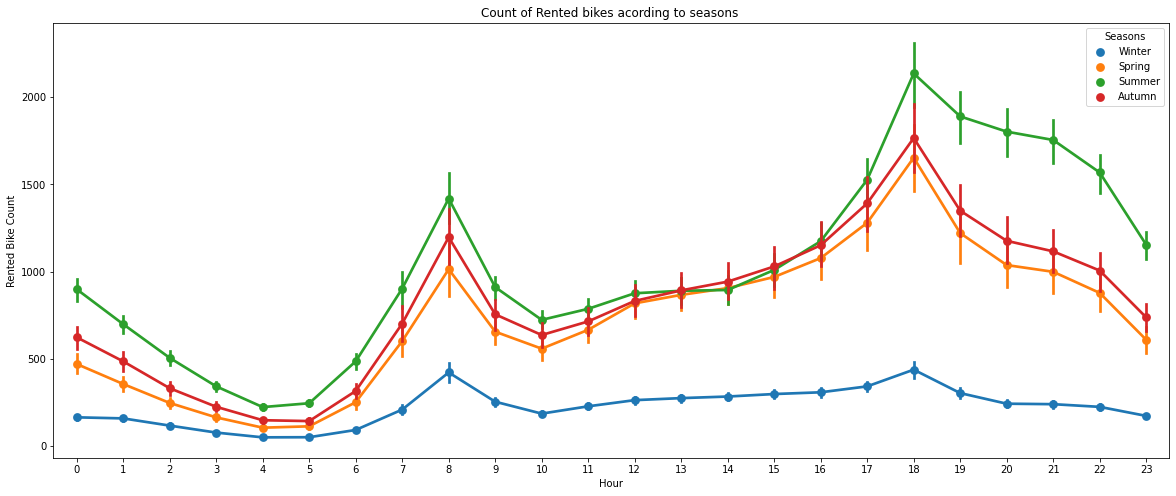

In [159]:
# Chart - 7 visualization code
# Count of Rented bikes acording to seasons and Hours
fig,ax=plt.subplots(figsize=(20,8))
sb.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

##### 1. Why did you pick the specific chart?

**To Compare the seasons and its hours we need a chart which can clear all the thing so the point plot is suitable for getting these insights**

##### 2. What is/are the insight(s) found from the chart?

* **In the above point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,**
* **In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.**
* **In winter season the use of rented bike is very low because of snowfall.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

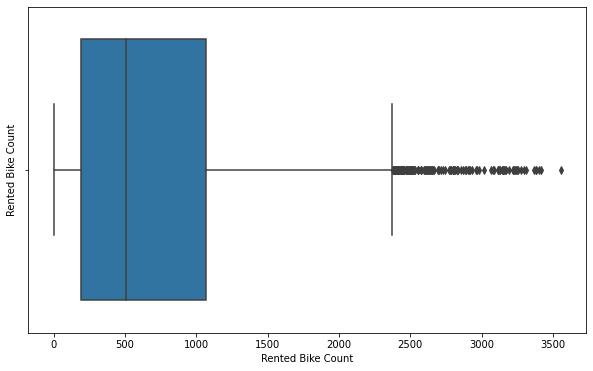

In [160]:
# Chart - 8 visualization code

plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sb.boxplot(x=df['Rented Bike Count'])
plt.show()

##### 1. Why did you pick the specific chart?

**Boxplot is one of the best plots that can be used for finding the ouliers**

##### 2. What is/are the insight(s) found from the chart?

**The above boxplot shows that we have detect outliers in Rented Bike Count column**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

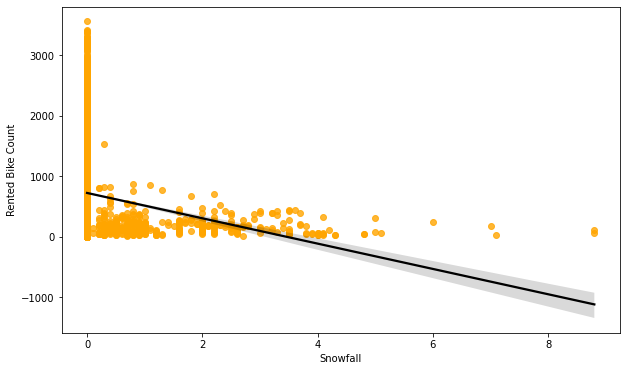

In [161]:
# Chart - 9 visualization code
fig,ax=plt.subplots(figsize=(10,6))
sb.regplot(x=df['Snowfall'],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

**Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

##### 2. What is/are the insight(s) found from the chart?

 **'Snowfall' feature is negatively related with the target variable which means the rented bike count decreases when these feature increase.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**its not a positive impact on business because its the variable snowfall if it increases the business will decrease**

#### Chart - 10

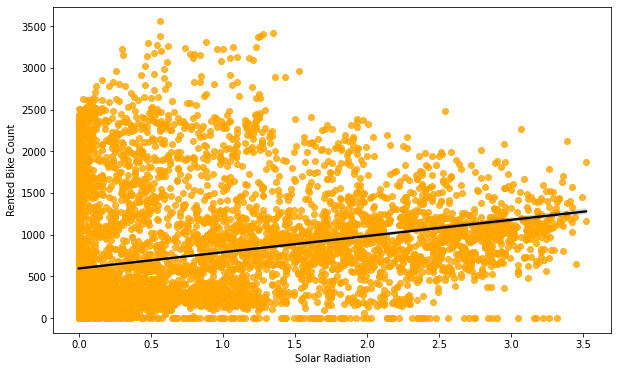

In [162]:
# Chart - 10 visualization code
fig,ax=plt.subplots(figsize=(10,6))
sb.regplot(x=df['Solar Radiation'],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

**Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**


##### 2. What is/are the insight(s) found from the chart?

**From the above regression plot of all numerical features we see that the column 'Solar_Radiation' id positively related to the target variable.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the solar radiation is a variable which is positively corelated with bike rented means if the radiation increase there will be a high chance of more bike will get rented**

#### Chart - 11

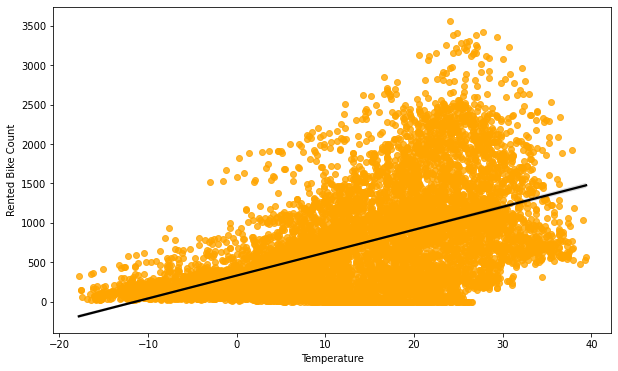

In [163]:
# Chart - 11 visualization code
fig,ax=plt.subplots(figsize=(10,6))
sb.regplot(x=df['Temperature'],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

**Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

##### 2. What is/are the insight(s) found from the chart?

**From the above regression plot of all numerical features we see that the column 'Temperature' is positively related to the target variable.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the Temperature is a variable which is positively corelated with bike rented means if the Temperature increase there will be a high chance of more bike will get rented**

#### Chart - 12

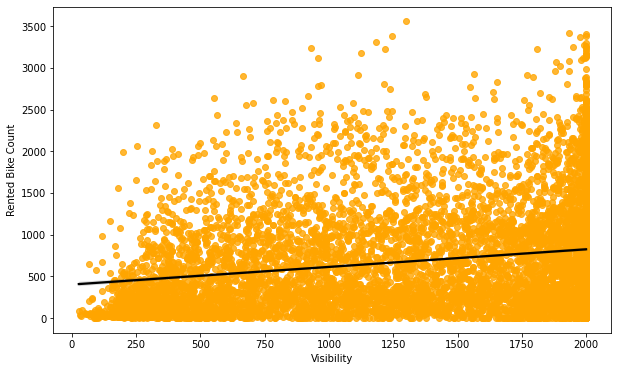

In [164]:
# Chart - 12 visualization code
fig,ax=plt.subplots(figsize=(10,6))
sb.regplot(x=df['Visibility'],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

**Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

##### 2. What is/are the insight(s) found from the chart?


**From the above regression plot of all numerical features we see that the column 'Visibility' is positively relation to the target variable.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the Visiblity is a variable which is slight positively corelated with bike rented means if the Visiblity increase there will be a  chance of more bike will get rented**

#### Chart - 13

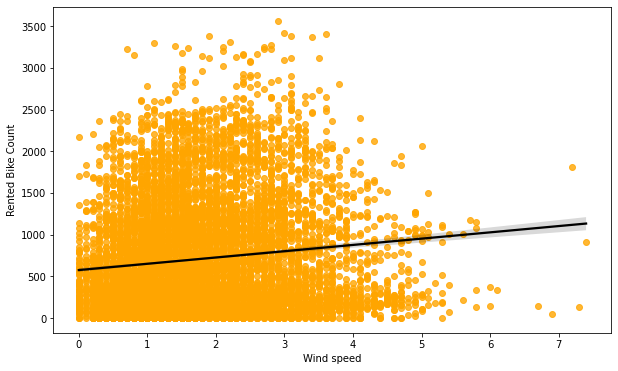

In [165]:
# Chart - 13 visualization code
fig,ax=plt.subplots(figsize=(10,6))
sb.regplot(x=df['Wind speed'],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

**Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

##### 2. What is/are the insight(s) found from the chart?

**From the above regression plot of all numerical features we see that the column 'Wind_speed' is positively relation to the target variable.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the Wind speed is a variable which is positively corelated with bike rented means if the Wind speed increase there will be a high chance of more bike will get rented**

#### Chart - 14 - Correlation Heatmap

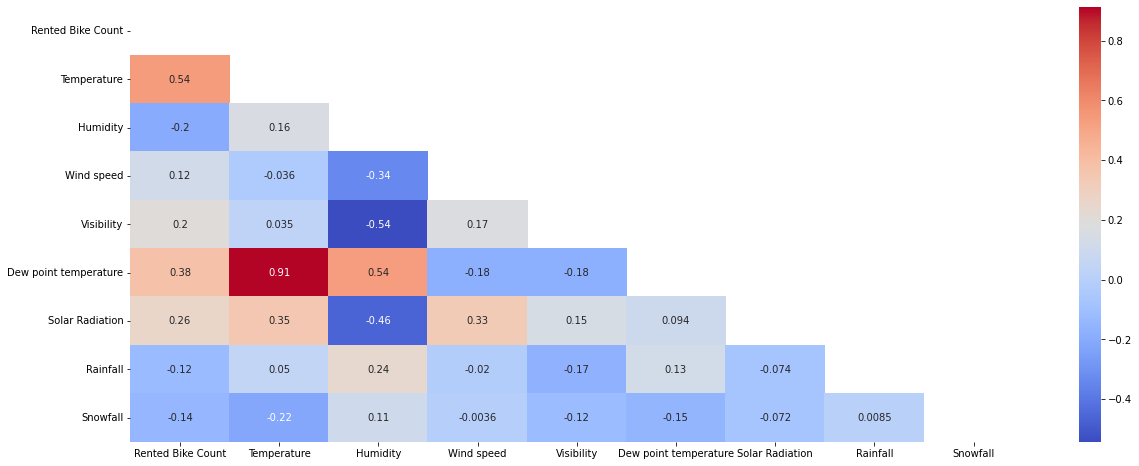

In [166]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sb.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

**With Heatmap we check correletion betweeen Different variables**

##### 2. What is/are the insight(s) found from the chart?

**We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :**

* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are:**
* Humidity
* Rainfall



#### Chart - 15 - Pair Plot 

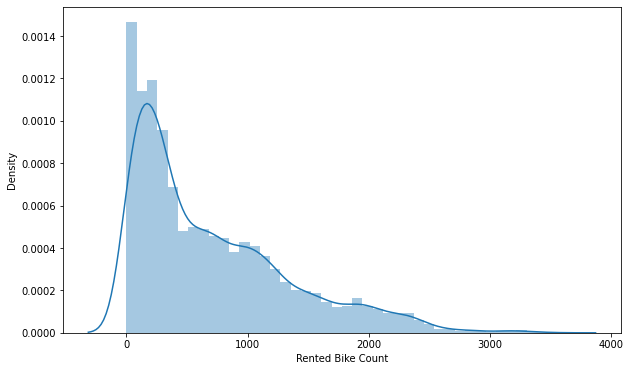

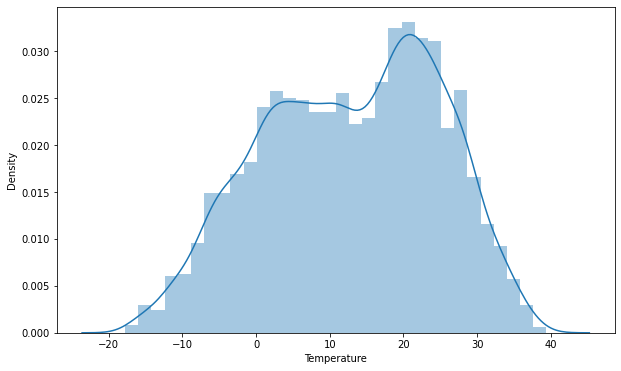

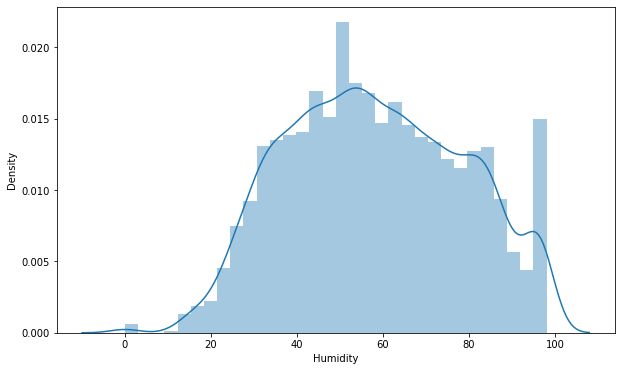

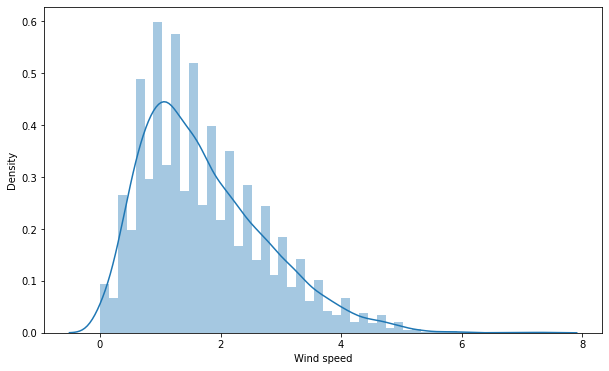

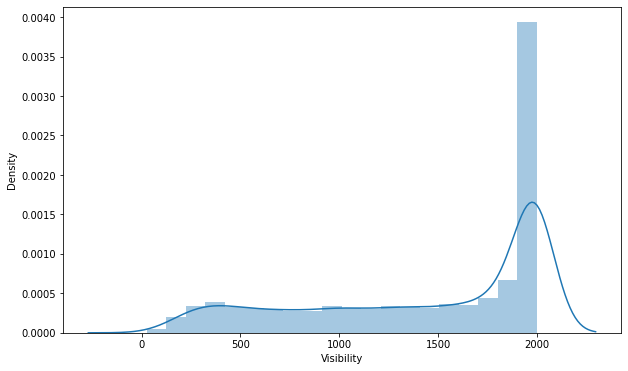

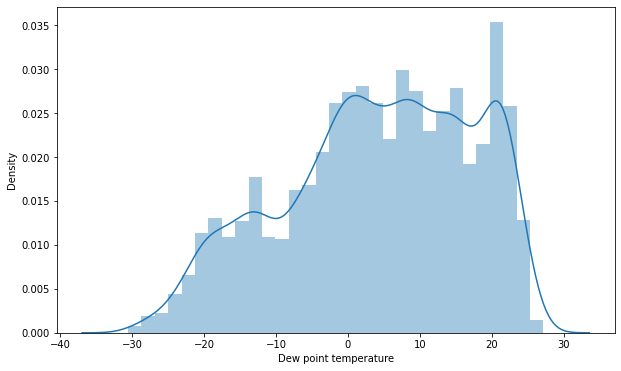

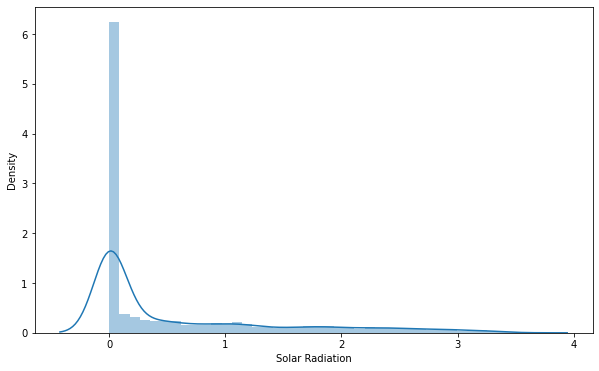

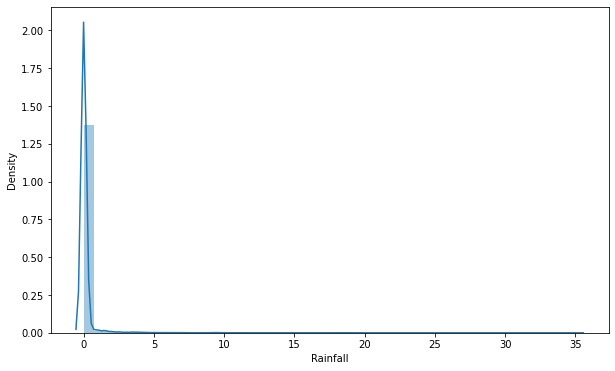

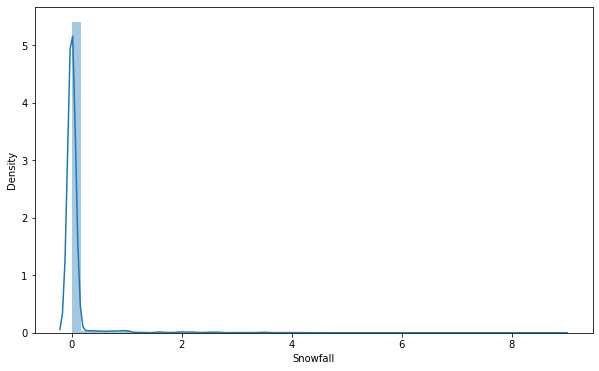

In [167]:
# Pair Plot visualization code

# pair plot to Find out the relationship Between the variables
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

for col in numerical_features:
  plt.figure(figsize=(10,6))
  sb.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

##### 1. Why did you pick the specific chart?

**Pair Plots are a Really Simple way to visualize the relationships between each variable**

##### 2. What is/are the insight(s) found from the chart?

* **We can see from the plots that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.**

* **We can see from the plots that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes**
* **We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower**
* **from the plots we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000**
* **From the plots of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.**
* **From the plots we see that people like to ride bikes when it is pretty hot around 25°C in average**


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [168]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [169]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [170]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [171]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [172]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [173]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [174]:
# Expand Contraction

#### 2. Lower Casing

In [175]:
# Lower Casing

#### 3. Removing Punctuations

In [176]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [177]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [178]:
# Remove Stopwords

In [179]:
# Remove White spaces

#### 6. Rephrase Text

In [180]:
# Rephrase Text

#### 7. Tokenization

In [181]:
# Tokenization

#### 8. Text Normalization

In [182]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [183]:
# POS Taging

#### 10. Text Vectorization

In [184]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [185]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [186]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [187]:
# Transform Your data

### 6. Data Scaling

In [188]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [189]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [190]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [191]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [192]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [193]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [194]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [195]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [196]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [197]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [198]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [199]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [200]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [201]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***